# What drives the price of a car?

**OVERVIEW**

In this application, we will explore a dataset from kaggle that contains information on 426K cars to ensure speed of processing. The goal is to understand what factors make a car more or less expensive. We will provide clear recommendations on what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


We will refer back to a standard process in industry for data projects called CRISP-DM.

### Business Understanding

The data task is to develop a predictive model that identifies the most significant factors that influence used car prices. This requires collecting and cleaning a large dataset of used cars, transforming and selecting relevant features, and building and evaluating a machine learning model that can accurately predict the price of a used car based on the selected features. The model will be trained on historical data and validated on a holdout set to ensure it is robust and generalizable to new data.

Methodology:

<ol type="1">
    <li> Data Exploration </li>
    <ol type="A">
        <li>Examine the features in the dataset</li>
        <li>Determine their nature: categorical vs numerical, discrete vs continuous</li>
        <li>Examine their unique values to decide if: a) they should be retained AND b) if and how they should be transformed</li>
    </ol>

<li> Data Preparation </li>
    <ol type="A">
        <li>Remove records that are missing important features</li>
        <li>Remove data outliers to avoid polluting model performance</li>
        <li>Remove duplicate records</li>
        <li>Perform data transformation (Logarithmic) of the target variable normalize its distributions</li>
        <li>Finalize the features and target for regression modeling</li>
        <li>Split dataset for training and teseting</li>
    </ol>

<li> Regression Modeling </li>
    <ol type="A">
        <li>Set up a pipeline to perform the feature transformations and run linear regressions</li>
        <li>Compare RIDGE and LASSO linear regression models</li>
        <li>Use grid search to find the best regularization hyperparameter alpha</li>
        <li>Evaluate model performance</li>
    </ol>
<li> Evaluation </li>
    <ol type="A">
        <li> Perform Coefficient Importance </li>
        <li> Perform Residual Analysis </li>
    </ol>

 <li> Deployment </li>
    <ol type="A">
        <li> Key Insights </li>
        <li> Business Recommendations </li>
        <li> Next Steps </li>
    </ol>
</ol>

### Data Understanding

After considering the business understanding, we will get familiar with our data

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [3]:
# read the data
df = pd.read_csv('data/vehicles.csv')

In [4]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [5]:
# Dataset stats
print("Number of records in the dataset:", df.shape[0])
print("Number of features in the dataset:", df.shape[1])
print('-'*100)
print("The attributes of data :", df.columns.values)

Number of records in the dataset: 426880
Number of features in the dataset: 18
----------------------------------------------------------------------------------------------------
The attributes of data : ['id' 'region' 'price' 'year' 'manufacturer' 'model' 'condition'
 'cylinders' 'fuel' 'odometer' 'title_status' 'transmission' 'VIN' 'drive'
 'size' 'type' 'paint_color' 'state']


In [6]:
# drop columns that don't impact the regression model
df.drop(columns=['id','VIN','region'], inplace=True)
# drop records with missing values
df.dropna(inplace=True)

In [7]:
# Check for missing values
print('Are any records missing values?',df.isnull().values.any())
missing_percentage = df.isnull().sum()*100/len(df)
missing_value_df = pd.DataFrame({'missing_count': df.isnull().sum(),'missing_percentage': missing_percentage})
missing_value_df[missing_value_df.missing_count != 0]

Are any records missing values? False


,missing_count,missing_percentage


In [8]:
# Explore the unique values of categorical features
print(df['year'].sort_values().unique())
maker = df['manufacturer'].sort_values().unique()
print(f'number of manufacturers: {len(maker)}')
print(np.vstack(maker))

models = df['model'].unique()
print(f'number of models: {len(models)}')
print(models)

print(df['condition'].unique())
print(df['cylinders'].unique())
print(df['fuel'].unique())
print(df['title_status'].unique())
print(df['transmission'].unique())
print(df['drive'].unique())
print(df['size'].unique())
print(df['type'].unique())
print(df['paint_color'].unique())

states = df['state'].unique()
print(f'number of states: {len(states)}')
print(states)

[1900. 1905. 1913. 1918. 1923. 1924. 1925. 1926. 1927. 1928. 1929. 1930.
 1931. 1932. 1933. 1934. 1935. 1936. 1937. 1938. 1939. 1940. 1941. 1942.
 1944. 1946. 1947. 1948. 1949. 1950. 1951. 1952. 1953. 1954. 1955. 1956.
 1957. 1958. 1959. 1960. 1961. 1962. 1963. 1964. 1965. 1966. 1967. 1968.
 1969. 1970. 1971. 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980.
 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992.
 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004.
 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016.
 2017. 2018. 2019. 2020. 2021. 2022.]
number of manufacturers: 41
[['acura']
 ['alfa-romeo']
 ['aston-martin']
 ['audi']
 ['bmw']
 ['buick']
 ['cadillac']
 ['chevrolet']
 ['chrysler']
 ['datsun']
 ['dodge']
 ['ferrari']
 ['fiat']
 ['ford']
 ['gmc']
 ['harley-davidson']
 ['honda']
 ['hyundai']
 ['infiniti']
 ['jaguar']
 ['jeep']
 ['kia']
 ['land rover']
 ['lexus']
 ['lincoln']
 ['mazda']
 ['mercedes-benz']
 ['merc

In [9]:
# Run a correlation matrix to see how the features are correlated
df[['price', 'year', 'odometer']].corr()

,price,year,odometer
price,1.000000,-0.001535,0.000620
year,-0.001535,1.000000,-0.091326
odometer,0.000620,-0.091326,1.000000


### Feature Definitions

**01. Price:** Price in USD, not adjusted for inflation.

**02. Year:** The year in which the car was manufactured

**03. Manufacturer:** 43 unique auto brands that manufacture the automobiles that are a part of this dataset.

**04. Model:** The model of the car.

**05. Condition:** The condition of the car; excellent, good, fair, like new, salvage, new.

**06. Cylinders:** The number of cylinders in the car engine ranging from 3 to 12. Also has the ‘other’ category too.

**07. Fuel:** There were five types of fuel, ‘diesel’, ‘gas’, ‘electric’, ‘hybrid’ and ‘other’.

**08. Odometer:** The distance travelled by the car after it was first bought.

**09. Title_Status:** The cars have 6 types of statues; ‘clean’, ‘lien’, ‘rebuilt’, ‘salvage’ , ‘parts only’ and ‘missing’.

**10. Transmission:** There are 3 types of transmission; 'automatic', manual and other.

**11. Drive:** There are 3 types of drive transmissions; ‘4WD, ‘FWD’ and ‘RWD’. (Four-wheel drive, forward-wheel drive and rear-wheel drive.)

**12. Size:** Size of the vehicle

**13. Type:** This feature identifies if a vehicle is a SUV or a mini-van. There 13 unique values in this feature.

**14. Paint_Color:** This feature identifies the color of the car. There 12 unique values in this feature.

**15. State:** The state is political territory and is represented in short form in the data set. Like “fl” is used for the state of Florida.

### Data Preparation
On examining the data, we will select records that have a reasonable: a) age (< 15 years), b) milage (< 150,000 miles) and c) target-price (> $2000). We will also remove records with title_status = "parts only". 'Condition' has a natural ranking, we will transform it using ordinal encoding.

In [10]:
# apply filters on the features
df_clean = df.query(' \
    (2000 < price < 50000) & \
    ( 2007 < year < 2023 ) & \
    ( 1000 < odometer < 150000 ) & \
    title_status != "parts only" \
')

In [11]:
# fix the categorical ranking for condition
print(df_clean['condition'].unique())
df_clean['condition'] = df_clean['condition'].astype('category')
df_clean['condition'] = df_clean['condition'].cat.set_categories(
    ['salvage', 'fair', 'good', 'excellent', 'like new', 'new'], ordered=True)

['excellent' 'good' 'like new' 'new' 'fair' 'salvage']


/var/folders/40/knrszf7s06x1kchcyxvjzdrr0000gn/T/ipykernel_116/2410089250.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['condition'] = df_clean['condition'].astype('category')
/var/folders/40/knrszf7s06x1kchcyxvjzdrr0000gn/T/ipykernel_116/2410089250.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['condition'] = df_clean['condition'].cat.set_categories(


In [12]:
# remove price outliers

df_filtered = pd.DataFrame(columns=df_clean.columns)
yrs_lst = df_clean['year'].sort_values().unique()

for y in yrs_lst:
    n = df_clean.query('year == @y')['price'].count()
    q_low = df_clean.query('year == @y')['price'].quantile(0.05)
    q_hi  = df_clean.query('year == @y')['price'].quantile(0.95)
    df_tmp = df_clean.query( 'year == @y & ( @q_low < price <= @q_hi )')
    nf = df_tmp.price.count()
    df_filtered = pd.concat( [df_tmp, df_filtered], axis=0, ignore_index=True )
    print(f'count= {n} filtered= {nf} year={y} q_low={q_low} q_hi={q_hi}')

count= 2553 filtered= 2292 year=2008.0 q_low=3500.0 q_hi=27990.0
count= 1960 filtered= 1759 year=2009.0 q_low=3900.0 q_hi=23000.0
count= 2456 filtered= 2212 year=2010.0 q_low=4495.0 q_hi=22990.0
count= 3046 filtered= 2740 year=2011.0 q_low=4950.0 q_hi=27990.0
count= 3600 filtered= 3228 year=2012.0 q_low=5000.0 q_hi=32902.499999999985
count= 4330 filtered= 3891 year=2013.0 q_low=5900.0 q_hi=29995.0
count= 4118 filtered= 3708 year=2014.0 q_low=6495.0 q_hi=34500.0
count= 3947 filtered= 3548 year=2015.0 q_low=7000.0 q_hi=43000.0
count= 3263 filtered= 2930 year=2016.0 q_low=8495.0 q_hi=41999.9
count= 3033 filtered= 2731 year=2017.0 q_low=9780.0 q_hi=41860.0
count= 2351 filtered= 2125 year=2018.0 q_low=10962.5 q_hi=45995.0
count= 1428 filtered= 1286 year=2019.0 q_low=14635.0 q_hi=46999.0
count= 655 filtered= 589 year=2020.0 q_low=16210.0 q_hi=46659.99999999999
count= 56 filtered= 53 year=2021.0 q_low=23499.25 q_hi=49995.0


In [13]:
df_filtered['price'] = df_filtered['price'].astype(float)

In [14]:
# df_filtered.info()
df_filtered.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,40900.0,2021.0,toyota,tacoma 4wd,good,6 cylinders,gas,1582.0,clean,automatic,4wd,full-size,truck,silver,al
1,40900.0,2021.0,toyota,tacoma 4wd,good,6 cylinders,gas,1582.0,clean,automatic,4wd,full-size,truck,silver,al
2,40900.0,2021.0,toyota,tacoma 4wd,good,6 cylinders,gas,1582.0,clean,automatic,4wd,full-size,truck,silver,al
3,31500.0,2021.0,toyota,rav4,like new,4 cylinders,gas,2500.0,lien,automatic,4wd,mid-size,SUV,silver,ak
4,26971.0,2021.0,toyota,camry se awd,like new,4 cylinders,gas,3047.0,clean,automatic,4wd,mid-size,sedan,red,az


In [15]:
# remove duplicates
df_filtered.drop_duplicates(inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26262 entries, 0 to 33091
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         26262 non-null  float64
 1   year          26262 non-null  object 
 2   manufacturer  26262 non-null  object 
 3   model         26262 non-null  object 
 4   condition     26262 non-null  object 
 5   cylinders     26262 non-null  object 
 6   fuel          26262 non-null  object 
 7   odometer      26262 non-null  object 
 8   title_status  26262 non-null  object 
 9   transmission  26262 non-null  object 
 10  drive         26262 non-null  object 
 11  size          26262 non-null  object 
 12  type          26262 non-null  object 
 13  paint_color   26262 non-null  object 
 14  state         26262 non-null  object 
dtypes: float64(1), object(14)
memory usage: 3.2+ MB


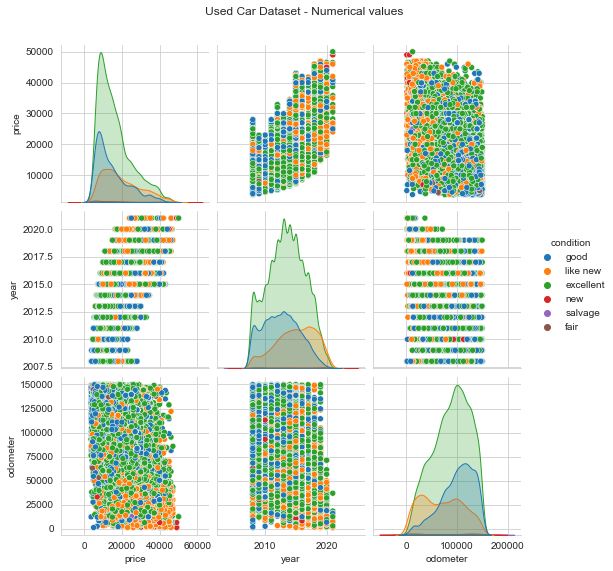

In [16]:
### examine the correlation between variables
g = sns.pairplot(df_filtered, hue='condition')
g.fig.suptitle('Used Car Dataset - Correlation between numerical values', y=1.05)
plt.show()

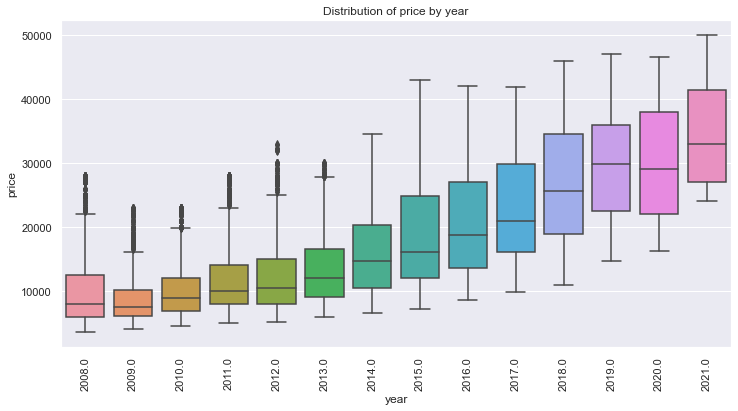

In [17]:
## box plot of car price by year
sns.set(rc={'figure.figsize':(12,6)})
sns.boxplot(data=df_filtered, x='year', y='price').set(title='Distribution of price by year')
ax = plt.xticks(rotation=90)
plt.show()

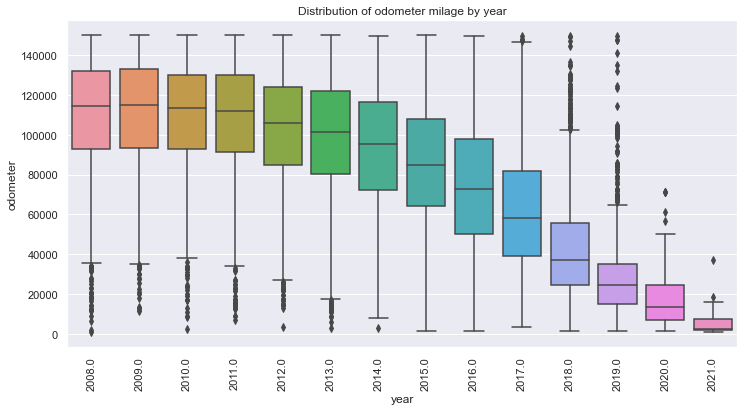

In [18]:
## boxplot of odometer mileage by year
sns.set(rc={'figure.figsize':(12,6)})
sns.boxplot(data=df_filtered, x='year', y='odometer').set(title='Distribution of odometer milage by year')
ax = plt.xticks(rotation=90)
plt.show()

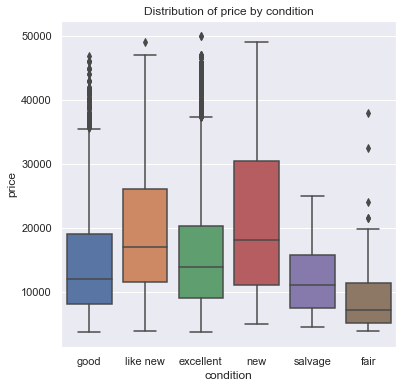

In [19]:
### Relationship between price and condition of the car
sns.set(rc={'figure.figsize':(6,6)})
sns.boxplot(data=df_filtered, x='condition', y='price').set(title='Distribution of price by condition')
plt.show()

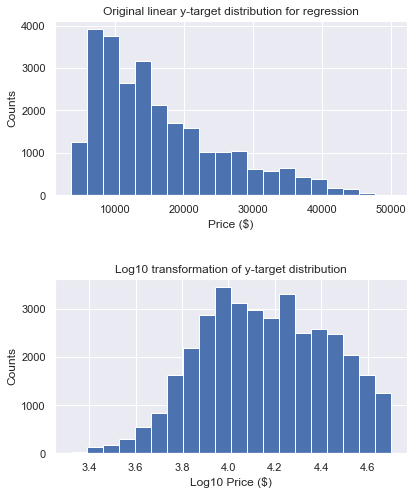

In [20]:
# compare the distribution of the target variable: price - Original vs Log10
fig, axs = plt.subplots(2, 1, figsize=(7,8))
fig.tight_layout(pad=5.0)

axs[0].hist( df_filtered['price'], bins=20)
axs[0].set_xlabel('Price ($)')
axs[0].set_ylabel('Counts')
axs[0].set_title('Original linear y-target distribution for regression')

axs[1].hist( np.log10(df_clean['price']), bins=20)
axs[1].set_xlabel('Log10 Price ($)')
axs[1].set_ylabel('Counts')
axs[1].set_title('Log10 transformation of y-target distribution')
plt.show()

### Modeling

Build a number of different regression models with the price as the target. Explore different parameters and cross-validate findings.

In [21]:
# final features chosen for regression analysis
features = ['year', 'condition', 'cylinders', 'fuel', 'odometer',
            'title_status', 'transmission', 'drive', 'size', 'type']

In [22]:
X = df_filtered[features]
y = np.log10( df_filtered['price'] )

In [23]:
from sklearn.model_selection import train_test_split

#### split dataset 70:30, 70% for training, 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)
print(X_train.shape)
print(X_test.shape)

(18383, 10)
(7879, 10)


In [24]:
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn import set_config
set_config(display="diagram")

import warnings
warnings.filterwarnings('ignore')

In [25]:
#### Create column transformer for pipeline workflow
column_trans = make_column_transformer(
    (StandardScaler(), ['year', 'odometer']),
    (OneHotEncoder(handle_unknown='ignore'), ['cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type'] ),
    (OrdinalEncoder(categories=[['salvage', 'fair', 'good', 'excellent', 'like new', 'new']]), ['condition']),
    remainder='passthrough', verbose_feature_names_out=False )

In [26]:
### Setup Ridge Regression pipeline and grid search for hyperparameter alpha-regularization
ridge_param_dict = {'ridge__alpha': np.logspace(-5, 5, 50)}
pipe = Pipeline([
    ('transformer', column_trans),
    ('ridge', Ridge())
])
grid = GridSearchCV( pipe, param_grid = ridge_param_dict )

In [27]:
grid.fit( X_train, y_train )

GridSearchCV(estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['year',
                                                                          'odometer']),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['cylinders',
                                                                          'fuel',
                                                                          'title_status',
                                                                          'transmission',
                                                                          'drive',
                                                                          'size',
                                                                          'type']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['salvage...
       7.90604321e-01, 1.26485522e+00, 2.02358965e+00, 3.23745754e+00,
       5.17947468e+00, 8.28642773e+00, 1.32571137e+01, 2.12095089e+01,
       3.39322177e+01, 5.42867544e+01, 8.68511374e+01, 1.38949549e+02,
       2.22299648e+02, 3.55648031e+02, 5.68986603e+02, 9.10298178e+02,
       1.45634848e+03, 2.32995181e+03, 3.72759372e+03, 5.96362332e+03,
       9.54095476e+03, 1.52641797e+04, 2.44205309e+04, 3.90693994e+04,
       6.25055193e+04, 1.00000000e+05])})

In [28]:
## Get the best model from grid search
best_model = grid.best_estimator_
best_alpha = grid.best_params_
best_alpha_str=(f'Optimal alpha: {list(best_alpha.values())[0].round(3)}')
train_mse = mean_squared_error(y_train, best_model.predict(X_train))
test_mse = mean_squared_error(y_test, best_model.predict(X_test))
best_mse_str=(f'MSE: Training={train_mse: .4f}, Test={test_mse: .4f}')
train_mae = median_absolute_error( y_train, best_model.predict(X_train) )
test_mae = median_absolute_error( y_train, best_model.predict(X_train) )
best_mae_str=(f'MAE: Training={train_mae: .4f}, Test={test_mae: .4f}')
print(best_mae_str)
print(best_mse_str)
print(best_alpha_str)

MAE: Training= 0.0708, Test= 0.0708
MSE: Training= 0.0120, Test= 0.0119
Optimal alpha: 3.237


In [29]:
#### Setup LASSO regression pipeline workflow and grid search for hyperparameter alpha-regularization
lasso_param_dict = { 'lasso__alpha' : np.logspace(-5, 5, 50)}
pipe2 = Pipeline([
    ('transformer', column_trans),
    ('lasso', Lasso())
])
grid2 = GridSearchCV( pipe2, param_grid = lasso_param_dict )

In [30]:
grid2.fit( X_train, y_train )

GridSearchCV(estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['year',
                                                                          'odometer']),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['cylinders',
                                                                          'fuel',
                                                                          'title_status',
                                                                          'transmission',
                                                                          'drive',
                                                                          'size',
                                                                          'type']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['salvage...
       7.90604321e-01, 1.26485522e+00, 2.02358965e+00, 3.23745754e+00,
       5.17947468e+00, 8.28642773e+00, 1.32571137e+01, 2.12095089e+01,
       3.39322177e+01, 5.42867544e+01, 8.68511374e+01, 1.38949549e+02,
       2.22299648e+02, 3.55648031e+02, 5.68986603e+02, 9.10298178e+02,
       1.45634848e+03, 2.32995181e+03, 3.72759372e+03, 5.96362332e+03,
       9.54095476e+03, 1.52641797e+04, 2.44205309e+04, 3.90693994e+04,
       6.25055193e+04, 1.00000000e+05])})

In [31]:
## get the best model from grid search
best_model2 = grid2.best_estimator_
best_alpha2 = grid2.best_params_
best_alpha_str2=(f'Optimal alpha: {list(best_alpha2.values())[0].round(5)}')

train_mse = mean_squared_error(y_train, best_model2.predict(X_train))
test_mse = mean_squared_error(y_test, best_model2.predict(X_test))
best_mse_str2=(f'MSE: Training={train_mse: .4f}, Test={test_mse: .4f}')

train_mae = median_absolute_error( y_train, best_model2.predict(X_train) )
test_mae = median_absolute_error( y_train, best_model2.predict(X_train) )
best_mae_str2=(f'MAE: Training={train_mae: .4f}, Test={test_mae: .4f}')

print(best_mae_str2)
print(best_mse_str2)
print(best_alpha_str2)

MAE: Training= 0.0708, Test= 0.0708
MSE: Training= 0.0120, Test= 0.0119
Optimal alpha: 3e-05


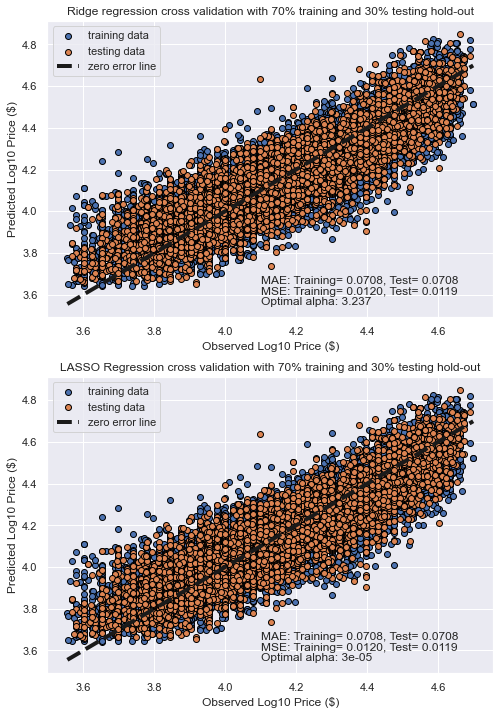

In [32]:
# Residual Plot, compare observed and predicted price from two regression models
fig, axes = plt.subplots(2, 1, figsize=(8,12))

axes[0].scatter(y_train, best_model.predict(X_train), edgecolors=(0, 0, 0), label='training data')
axes[0].scatter(y_test, best_model.predict(X_test), edgecolors=(0, 0, 0), label='testing data')
axes[0].plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4, label='zero error line')
axes[0].set_xlabel("Observed Log10 Price ($)")
axes[0].set_ylabel("Predicted Log10 Price ($)")
axes[0].set_title("Ridge regression cross validation with 70% training and 30% testing hold-out")
axes[0].text(4.1, 3.55, best_alpha_str)
axes[0].text(4.1, 3.60, best_mse_str)
axes[0].text(4.1, 3.65, best_mae_str)
axes[0].legend()

axes[1].scatter(y_train, best_model2.predict(X_train), edgecolors=(0, 0, 0), label='training data')
axes[1].scatter(y_test, best_model2.predict(X_test), edgecolors=(0, 0, 0), label='testing data')
axes[1].plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4, label='zero error line')
axes[1].set_xlabel("Observed Log10 Price ($)")
axes[1].set_ylabel("Predicted Log10 Price ($)")
axes[1].set_title("LASSO Regression cross validation with 70% training and 30% testing hold-out")
axes[1].text(4.1, 3.55, best_alpha_str2)
axes[1].text(4.1, 3.60, best_mse_str2)
axes[1].text(4.1, 3.65, best_mae_str2)
axes[1].legend()
plt.show()

In [33]:
### Cross Validation Ridge
cv_scores = cross_val_score(grid, X, y, cv = 5 )
# %store cv_scores

In [34]:
# Store -r cv_scores
print('Cross validation scores (5 folds): {}'.format(cv_scores))
print('The average cross validation score (5 folds): {}'.format(np.mean(cv_scores)))

Cross validation scores (5 folds): [0.59535284 0.70882968 0.67682883 0.61689336 0.55991963]
The average cross validation score (5 folds): 0.6315648698201979


In [35]:
### Cross Validation LASSO
cv_scores2 = cross_val_score( grid2, X, y, cv = 5 )
# %store cv_scores2

In [36]:
# store -r cv_scores2
print('Cross validation scores (5 folds): {}'.format(cv_scores2))
print('The average cross validation score (5 folds): {}'.format(np.mean(cv_scores2)))

Cross validation scores (5 folds): [0.59819455 0.70907338 0.67712465 0.61670888 0.55883511]
The average cross validation score (5 folds): 0.6319873143125256


In [37]:
from sklearn.preprocessing import OrdinalEncoder

class OrdinalEncoderWithNames(OrdinalEncoder):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def get_feature_names_out(self, input_features=None):
        if input_features is None:
            input_features = self.get_feature_names()
        output_features = []
        for feature in input_features:
            output_features.append(f"{self.__class__.__name__}__{feature}")
        return output_features

### Evaluation

After running the models, we will identify insights from them.

In [38]:
## for Ridge Regression, compute the importance of coefs using permutation_importance()
r = permutation_importance( grid, X_train, y_train, n_repeats=10, random_state=32 )
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{X.columns[i]:<16}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

year            0.484 +/- 0.006
cylinders       0.164 +/- 0.002
odometer        0.113 +/- 0.001
type            0.082 +/- 0.002
drive           0.074 +/- 0.001
title_status    0.017 +/- 0.001
fuel            0.014 +/- 0.001
condition       0.006 +/- 0.000
size            0.002 +/- 0.000
transmission    0.001 +/- 0.000


In [39]:
### for LASSO, compute the importance of coefs using permutation_importance()
r2 = permutation_importance( grid2, X_train, y_train, n_repeats=10, random_state=32 )
for i in r2.importances_mean.argsort()[::-1]:
    if r2.importances_mean[i] - 2 * r2.importances_std[i] > 0:
        print(f"{X.columns[i]:<16}"
              f"{r2.importances_mean[i]:.3f}"
              f" +/- {r2.importances_std[i]:.3f}")

year            0.485 +/- 0.006
cylinders       0.165 +/- 0.002
odometer        0.113 +/- 0.002
type            0.082 +/- 0.002
drive           0.074 +/- 0.001
title_status    0.017 +/- 0.001
fuel            0.014 +/- 0.001
condition       0.006 +/- 0.000
size            0.002 +/- 0.000
transmission    0.001 +/- 0.000


In [40]:
# recreate dataframe used in regression for prediction
features = ['year', 'condition', 'cylinders', 'fuel', 'odometer',
            'title_status', 'transmission', 'drive', 'size', 'type']
Xp = df_filtered[features]
#yp = df_filtered['price']
yp = np.log10( df_filtered['price'] )
# Xp.info()
# yp.describe()

In [41]:
# add additional columns to dataframe
Xp['predict'] = (10**best_model.predict(Xp)).round(2)
Xp['price'] = 10**yp
Xp['residual'] = Xp['price'] - Xp['predict']
#Xp.info()
#Xp

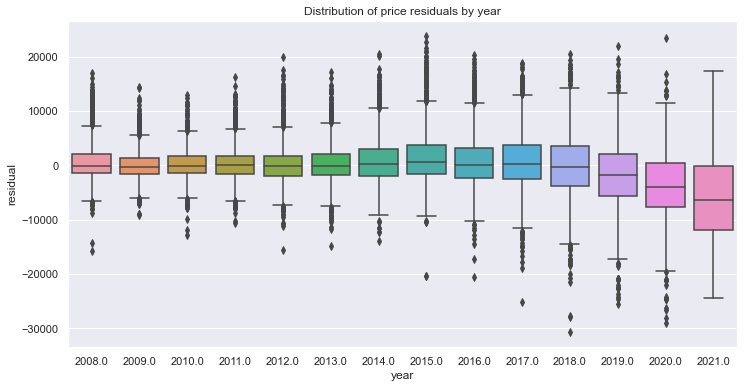

In [42]:
## check for residual trends by year
sns.set(rc={'figure.figsize':(12,6)})
sns.boxplot(data=Xp, x="year", y="residual" ).set(title='Distribution of price residuals by year')
plt.show()

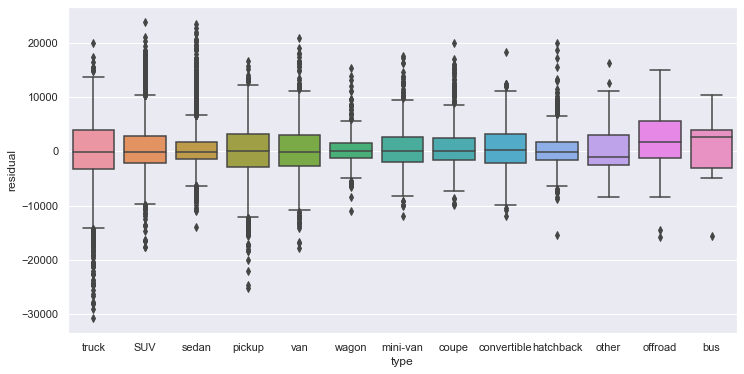

In [43]:
## check for residual trends by vehicle type
sns.set(rc={'figure.figsize':(12,6)})
sns.boxplot(data=Xp, x="type", y="residual" )
plt.show()

In [44]:
Xdrop = Xp.drop(columns=['price', 'year', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size', 'type'])
df_merge = pd.merge(df_filtered, Xdrop, left_index=True, right_index=True)

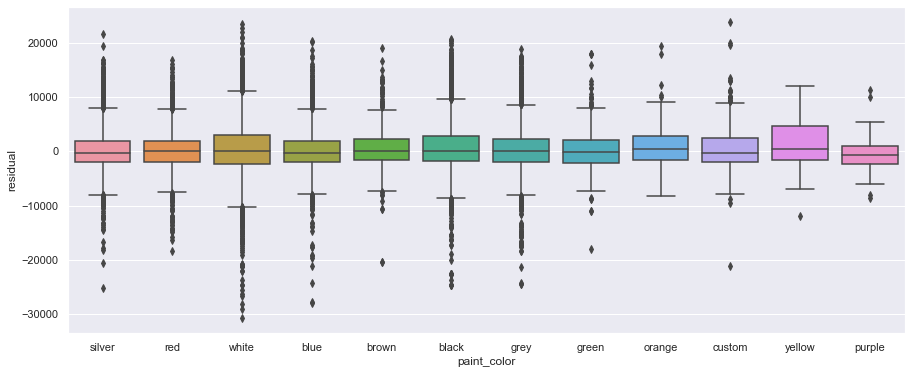

In [45]:
### no visible relationship between price residual and paint_color feature
sns.set(rc={'figure.figsize':(15,6)})
sns.boxplot(data=df_merge, x="paint_color", y="residual" )
plt.show()

In [46]:
## group all the residuals by state and compute the mean residual. Sort states by mean residuals.
resid_by_state = df_merge.groupby(by='state')[['state', 'residual']].mean().sort_values(by='residual', ascending=False)

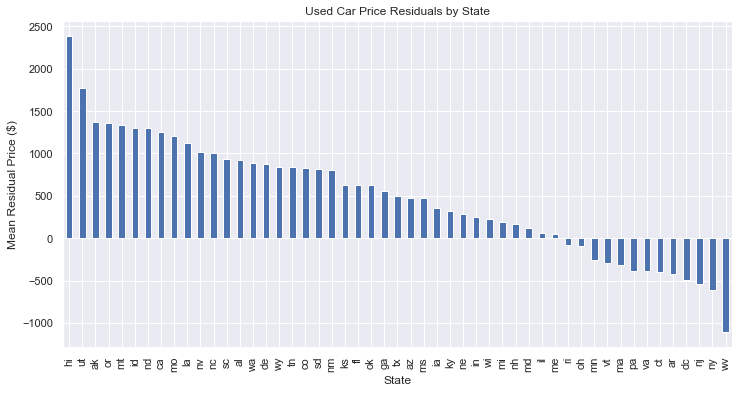

In [47]:
fig, ax = plt.subplots(figsize=(12,6))
resid_by_state.plot.bar(ax=ax, legend=False)
ax.set_xlabel('State')
ax.set_ylabel('Mean Residual Price ($)')
ax.set_title('Used Car Price Residuals by State')
fig.show()

### Deployment

### <div id="keyfindings"><a name="keyfindings">5.(A) Key Insights:</a></div>

1. The price of vehicles decrease with increasing age and higher odometer readings. Once the vehicle is ten years and older, its price falls dow to $10,000 or less.

2. The regression model indicates that specialized vehicles (e.g., off-road, truck) and powerful vehicles (cylinders > 6), have a higher price value while economy vehicles with lower power have a lower resale value.

3. The car's features: Year, # of cylinders and mileage were the most important.

4. Consumers want utility (off-road, trucks, four-wheel-drive) and powerful (10,8,6 cylinder) vehicles. As a result, vehicles with these features are valued more.

### <a name="future">5. (B) Next steps:</a>

<ol type="1">
<li>We recommend further analysis on the following :

<ol type="A">
<li>region</li>
<li>model and make</li>
<li>color</li>
</ol>
<P>
These features were not used in the regression. If trends exist, then future work could include adding these.

<li>Revisit the dataset in a few years to see if there is an increase in value for: a) fuel efficient vehicles due to gas inflation AND b) electric vehicles.</li>
</ol>